In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# The SIR Model

In [3]:
def sir_model(y, t, N, beta, gamma, gamma_death, gamma_nat=0.009):
    """ 
    The model consists of three compartments: 
    S for the number of susceptible, 
    I for the number of infectious, and 
    R for the number recovered (or immune) individuals. 
    This model is reasonably predictive for infectious diseases 
    which are transmitted from human to human, and where 
    recovery confers lasting resistance, such as measles, 
    mumps and rubella. 
    S: Suscepible number of population to catch the disease
    I: Infected population
    R: Recovered population
    D: Death
    N: Total population
    t: Time
    beta: Rate of infection (susceptible to infected)
    gamma: Rate of recovery (infected to recovered)
    gamma_death: Rate of death due to the disease
    gamma_nat: Natural death rate
    """
    S, I, R, D = y
    dS_dt = - (beta * I * S) / N
    dI_dt = ((beta * I * S) / N) - (gamma * I) - (gamma_death * I)
    dR_dt = gamma * I
    dD_dt = gamma_death * I - gamma_nat * I  #Subtract the cases which were due to natural death
    return [dS_dt, dI_dt, dR_dt, dD_dt]

# Solve the differential equations in SIR model

In [4]:
def pde_solver(N, beta, gamma, gamma_death, 
               t=np.arange(0, 365), I0=1, R0=0, D0=0):
    """
    We assume some initial conditions to solve the ODEs
    of the SIR model. The assumtion is that initially,
    only one person is affected, i.e. I0=1 and number
    of recovered persons and death is zero, i.e. R0=0
    and D0=0.
    """
    # Initial sueceptible population
    S0 = N - I0 - R0 - D0
    
    time = t
    
    # Initial population vector
    y0 = [S0, I0, R0, D0]
    
    #Solution of the SIR differential equations
    solve = odeint(sir_model, y0, time, args=(N, beta, gamma, gamma_death))
    result = np.transpose(solve)
    return time, result

# Plot the model predictions

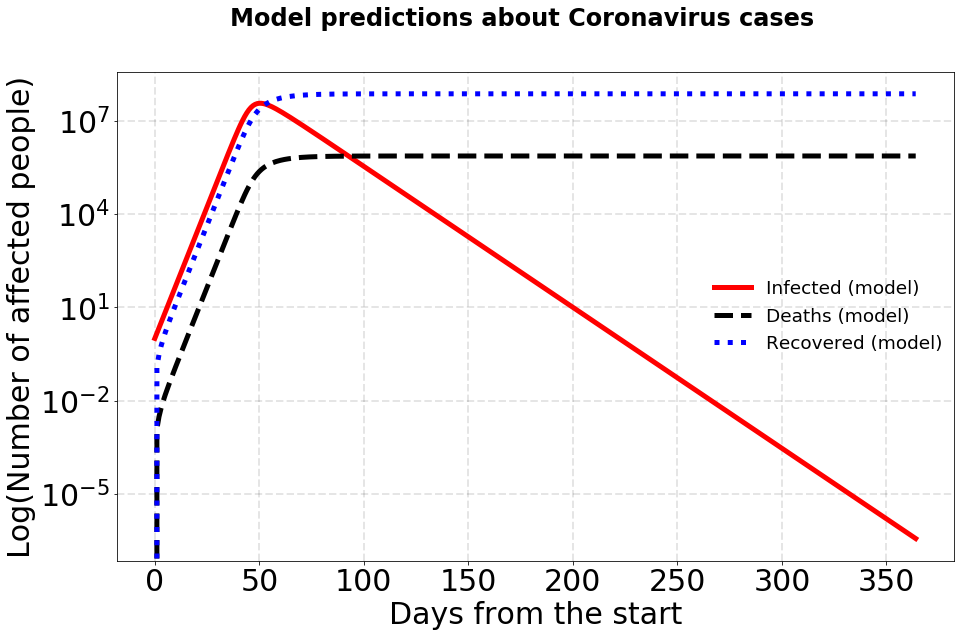

In [5]:
if __name__ == '__main__':
    res = pde_solver(82e6, 0.5, 0.1, 0.01)

    time = res[0]
    susceptible = res[1][0]
    infected = res[1][1]
    recovered = res[1][2]
    deaths = res[1][3]
    
    fig = plt.figure(figsize=(15, 9))
    fig.suptitle('Model predictions about Coronavirus cases', fontsize=24, fontweight='bold')
    ax = fig.add_subplot(1, 1, 1)
    font = {'family': 'serif', 'color': 'black',
            'weight': 'normal', 'size': 16.0}
    
    ax.plot(time, infected, ls='-', lw=5., color='red', label='Infected (model)')
    ax.plot(time, deaths, ls='--', lw=5., color='black', label='Deaths (model)')
    ax.plot(time, recovered, ls=':', lw=5., color='blue', label='Recovered (model)')
    
    ax.set_xlabel('Days from the start', fontsize = 30)
    ax.set_ylabel('Log(Number of affected people)', fontsize = 30)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)
    ax.legend(loc='best', borderpad=0.1, fontsize=18.5, framealpha=0)
    #ax.set_xscale('log')
    ax.set_yscale('log')

    plt.grid(lw=2., ls='--', color='black', alpha=0.1)
    plt.savefig('./output/Covid_model_Germany.png')

# Compare model and data

Indices:Index(['Time', 'Infected', 'Deaths', 'Recovered'], dtype='object')


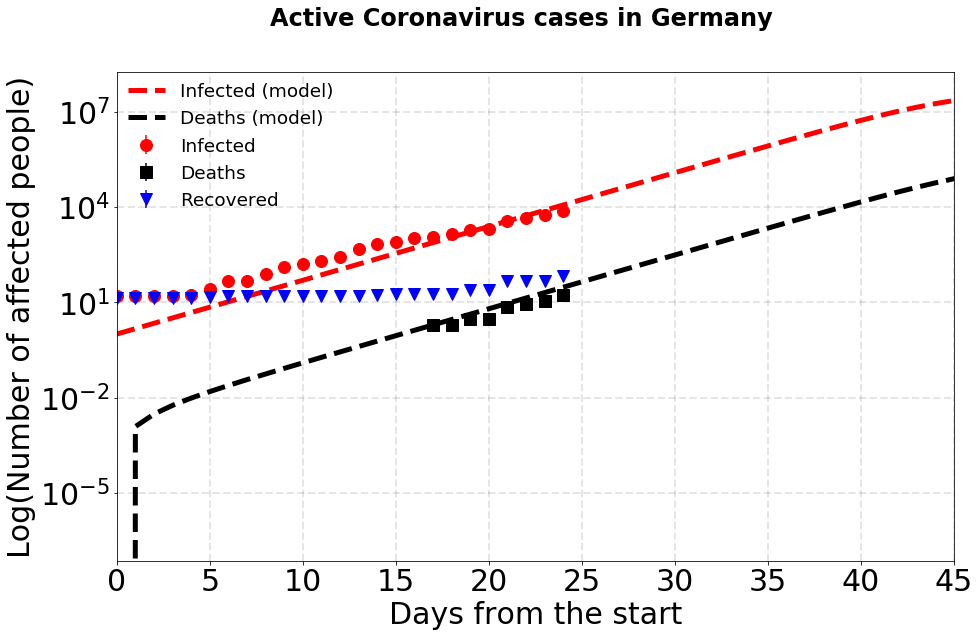

In [7]:
def plot_data_model(datafile):
    fig = plt.figure(figsize=(15, 9))
    fig.suptitle('Active Coronavirus cases in Germany', fontsize=24, fontweight='bold')
    ax = fig.add_subplot(1, 1, 1)
    font = {'family': 'serif', 'color': 'black',
            'weight': 'normal', 'size': 16.0}
    
    dat_tab = pd.read_csv(datafile, sep=',')
    print("Indices:{}".format(dat_tab.columns))
    
    time = dat_tab['Time']
    infected = dat_tab['Infected']
    deaths = dat_tab['Deaths']
    recovered = dat_tab['Recovered']
    
    # PLOT DATA
    ax.errorbar(time, infected, yerr=0, fmt='o', markersize=12., color='red', label='Infected')
    ax.errorbar(time, deaths, yerr=0, fmt='s', markersize=12., color='black', label='Deaths')
    ax.errorbar(time, recovered, yerr=0, fmt='v', markersize=12., color='blue', label='Recovered')
    
    #PLOT MODEL
    res = pde_solver(82e6, 0.5, 0.1, 0.01)

    time_model = res[0]
    susceptible_model = res[1][0]
    infected_model = res[1][1]
    recovered_model = res[1][2]
    deaths_model = res[1][3]
    
    ax.plot(time_model, infected_model, ls='--', lw=5., color='red', label='Infected (model)')
    ax.plot(time_model, deaths_model, ls='--', lw=5., color='black', label='Deaths (model)')
    #ax.plot(time_model, recovered_model, ls=':', lw=5., color='blue', label='Recovered (model)')
    
    
    ax.set_xlabel('Days from the start', fontsize = 30)
    ax.set_ylabel('Log(Number of affected people)', fontsize = 30)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)
    ax.legend(loc='best', borderpad=0.1, fontsize=18.5, framealpha=0)
    #ax.set_xscale('log')
    ax.set_yscale('log')

    plt.grid(lw=2., ls='--', color='black', alpha=0.1)
    plt.xlim(0, 45)
    
if __name__ == '__main__':
    plot_data_model('./datafiles/Covid_germany.txt')